In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
from IPython.display import display, Latex, Markdown
import plotly.express as px
import plotly.graph_objs as go
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
import warnings; warnings.simplefilter('ignore')

## LGBT Survey on Violence and Harrassment in European Countries

A survey was conducted throughout 28 European countries, asking questions about violence and harrassment. Each surveyees' sexual orientation information was also collected, so that the dataset provides illuminating information about how people's conceptions of violence and harrassment are related to their sexual orientations. To put it simply, "can we quantify how much people who identify themselves as part of the LGBTQ+ community fear violence and harrassment?" Provided by Kaggle, this dataset gives illuminating insight on a topic that many people take for granted. 

This dataset has many questions along with corresponding answers and other information, but for the purpose of this module, I have picked 3 questions. After cleaning the dataset, I have isolated each of these questions to their own dataframes and conducted a couple of visualizations. Because this is survey data, there is a lot of bias and therefore, I have not gone further than conducting basic visualizations. 

**This data only has information collected from people who identify as lesbian, gay, bisexual, and transgender, so I will refer to othis data as "LGBT", since it does not include surveyees who identify as queer. **

In [2]:
df = pd.read_csv("LGBT_Survey_ViolenceAndHarassment.csv") 

In [3]:
df['percentage']=df['percentage'].astype(str)
df_cleaned = df[df['percentage']!=":"]
df_cleaned = df_cleaned[df_cleaned['CountryCode']!="Average"]
df_cleaned['percentage'] = df_cleaned['percentage'].astype(int) 

In [4]:
e1 = df_cleaned[df_cleaned['question_code']=='e1']

## Which subset of the LGBT community avoids holding hands in public most in Europe?

In [5]:
e1_yes = e1[e1['answer']=='Yes']
e1_yes.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33,NaN
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51,NaN
8,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,Yes,18,NaN
12,Austria,Bisexual men,e1,Do you avoid holding hands in public with a sa...,Yes,39,NaN
16,Austria,Transgender,e1,Do you avoid holding hands in public with a sa...,Yes,25,NaN


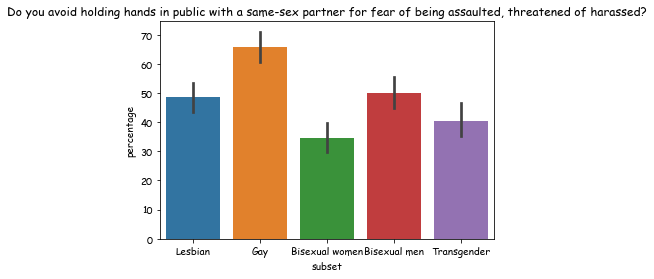

In [172]:
plt.title(e1_yes['question_label'][0])
sns.barplot(x="subset", y="percentage", data=e1_yes)

According to this survey data, gay and bisexual men avoid holding hands the most with a same-sex partner for fear of being asaulted, threatened, or harassed.

## In which country do people fear holding hands with a same-sex partner the most?

In [6]:
e1_country = e1_yes.groupby('CountryCode').agg(np.mean).reset_index()

<BarContainer object of 28 artists>

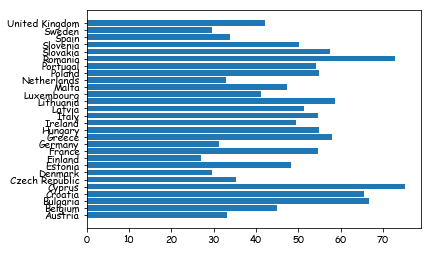

In [174]:
plt.barh(e1_country['CountryCode'],e1_country['percentage'],align='center',height=0.8)

According to this survey data, people in Romania and Cyprus avoid holding hands the most with a same-sex partner for fear of being asaulted, threatened, or harassed.

## Which subset of the LGBT community has been physically/sexually attacked or threatened with violence at home or elsewhere in the last 5 years in Europe?

In [176]:
f1_a = df_cleaned[df_cleaned['question_code']=='f1_a']
f1_a_yes = f1_a[f1_a['answer']=='Yes']
f1_a_yes['question_label'].iloc[0]

'In the last 5 years, have you been: physically/sexually attacked or threatened with violence at home or elsewhere (street, on public transport, at your workplace, etc) for any reason?'

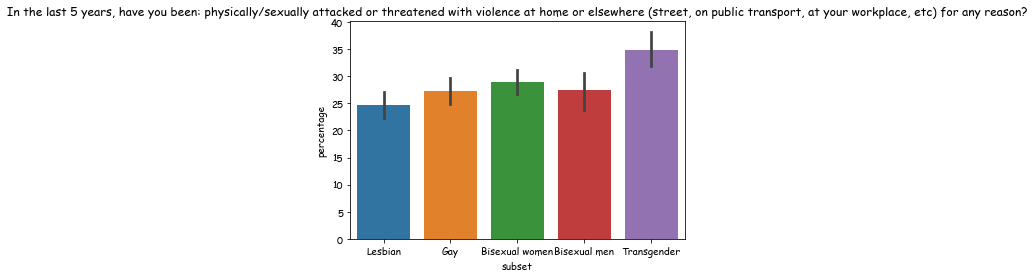

In [177]:
plt.title(f1_a_yes['question_label'].iloc[0])
sns.barplot(x="subset", y="percentage", data=f1_a_yes)

Close to 35% of transgender people have been attacked or threatened with violence. This is a shocking statistic from this survey data.

## In which country have people been physically/sexually attacked or threatened with violence at home or elsewhere most (by sexual orientation)?

In [178]:
f1_a_country = f1_a_yes.groupby('CountryCode').agg(np.mean).reset_index()

<BarContainer object of 28 artists>

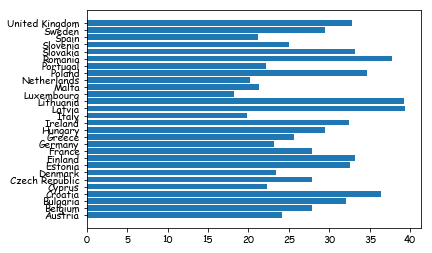

In [179]:
plt.barh(f1_a_country['CountryCode'],f1_a_country['percentage'],align='center',height=0.8)

The LGBT community have experienced most violence in Lithuania and Latvia.

## Which subset of the LGBT community avoids certain places most for fear of being assaulted, threatened, or harassed because they are L,G,B, or T?

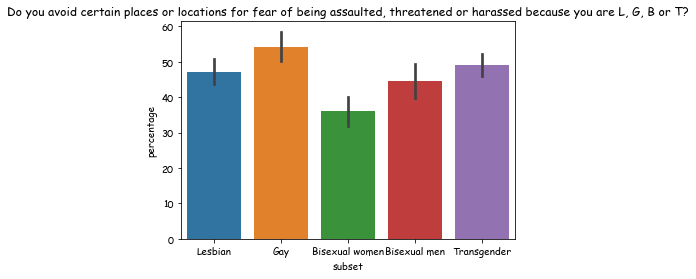

In [181]:
e2 = df_cleaned[df_cleaned['question_code']=='e2']
e2_yes = e2[e2['answer']=='Yes']
plt.title(e2_yes['question_label'].iloc[0])
sns.barplot(x="subset", y="percentage", data=e2_yes)

According to this survey data, gay and transgender people avoid certain places the most for fear of being assaulted, threatened, or harassed because they are L,G,B, or T.

## In which country do people avoid certain places for fear of being assualted because they are LGBT the most?

In [182]:
e2_country = e2_yes.groupby('CountryCode').agg(np.mean).reset_index()

<BarContainer object of 28 artists>

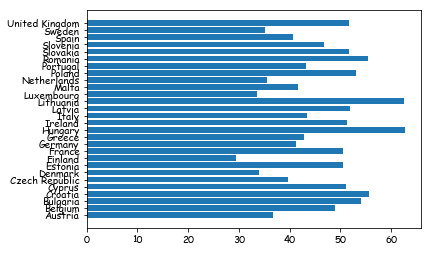

In [183]:
plt.barh(e2_country['CountryCode'],e2_country['percentage'],align='center',height=0.8)

The LGBT communities in Hungary and Lithuania avoid certain places for fear of being assaulted due to being LGBT the most.

## Follow Up Questions
#### What are the limitations of survey data?
#### What types of bias have occurred because of the way this data was collection?
#### What is the value of surveys?
#### What sort of questions are you inspired to research after seeing some of these visualizations?

## In case you are interested in seeing all the questions asked in this survey! 
## Challenge: Pick a question that was not explored in this dataset and conduct these visualizations!

In [9]:
df_cleaned.groupby(['question_label','question_code']).count().drop(['CountryCode','subset','answer','percentage','notes'],axis=1)

,
question_label,question_code
Did you or anyone else report the last incident of physical / sexual attack or threat of violence to any of the following organisations / institutions? *,fa1_13
Did you or anyone else report the last incident of physical / sexual attack or threat of violence to the police?,fa1_11
"Do you avoid certain places or locations for fear of being assaulted, threatened or harassed because you are L, G, B or T?",e2
"Do you avoid holding hands in public with a same-sex partner for fear of being assaulted, threatened of harassed?",e1
"Do you think the LAST incident of harassment in the past 12 months happened partly or completely because you were perceived to be L, G, B or T?",fb1_5
"Do you think the LAST incident of physical / sexual attack or threat of violence in the past 12 months happened partly or completely because you were perceived to be L, G, B or T?",fa1_5
"Do you think the MOST SERIOUS incident of harassment happened partly or completely because you were perceived to be L, G, B or T?",fb2_5
"Do you think this physical / sexual attack or threat happened partly or completely because you were perceived to be L, G, B or T?",fa2_5
How many times did somebody harass you in the last 12 months?,fb1_3
